In [1]:
%matplotlib notebook

In [2]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)
html = browser.html
soup = soup(html, 'html.parser')

In [4]:
rows = soup.find_all("tr", class_="data-row")

In [5]:
row_list = []
for row in rows:
    data = row.find_all("td")
    row=[col.text for col in data]
    row_list.append(row)

In [6]:
df = pd.DataFrame(row_list, columns = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"])
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [7]:
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [8]:
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

In [9]:
convert_dtypes = {'id': int,
                 'sol': int,
                 'ls': int,
                 'month':int,
                 'min_temp': float,
                 'pressure': float}
df = df.astype(convert_dtypes)
print(df.dtypes)

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


In [10]:
# How many months exist on Mars?
martian_months = df.month.nunique()
print(f"{martian_months} months exist on the planet Mars.")

12 months exist on the planet Mars.


In [11]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset?
martian_days = df.sol.nunique()
print(f"There are {martian_days} martian days worth of data in the scraped dataset.")

There are 1867 martian days worth of data in the scraped dataset.


In [28]:
# What are the coldest and the warmest months on Mars (at the location of Curiosity)? Get the answer by averaging the minimum daily temperature of all the months. 
# Plot the results as a bar chart
coldest_months = df.groupby("month").mean()
coldest_months.loc[:,["min_temp"]]

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


<IPython.core.display.Javascript object>


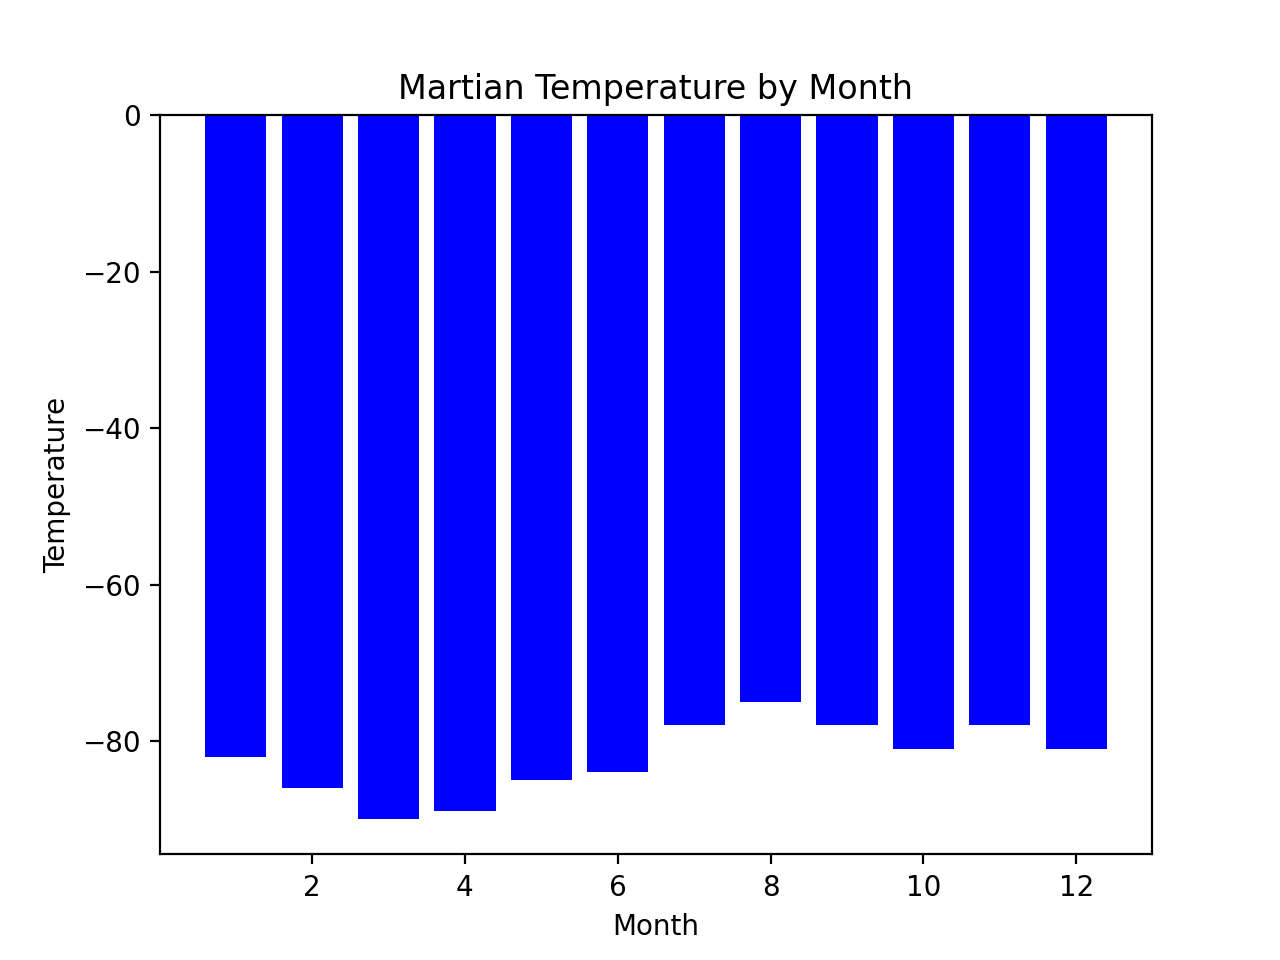

Text(0.5, 1.0, 'Martian Temperature by Month')

In [29]:
plt.bar(df["month"], df["min_temp"], color="blue")
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.title("Martian Temperature by Month")

In [30]:
# Which months have the lowest and the highest atmospheric pressure on Mars? Get the answer by averaging the daily atmospheric pressure of all the months. 
# Plot the results as a bar chart
avg_pressure = df.groupby("month").mean()
avg_pressure.loc[:,["pressure"]]

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


In [36]:
x = range(1,13)
plt.bar(x, avg_pressure["pressure"], color="red")
plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure")
plt.title("Martian Atmospheric Pressure by Month")

Text(0.5, 1.0, 'Martian Atmospheric Pressure by Month')

In [37]:
# About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles the Sun once, 
# how many days elapse on Earth? Visually estimate the result by plotting the daily minimum temperature.
earth_days = df.terrestrial_date.nunique()
earth_days

1867

In [38]:
mars_orbit = earth_days / martian_months
mars_orbit
print(f"The time elapsed on Earth during one martian orbit equals {mars_orbit:.2f} days.")

The time elapsed on Earth during one martian orbit equals 155.58 days.


In [39]:
plt.bar(df["terrestrial_date"], df["min_temp"], color="green")
plt.xlabel("Earth day")
plt.ylabel("Minimum Temp")
plt.title("Mars Orbit in Terrestrial Days")

Text(0.5, 1.0, 'Mars Orbit in Terrestrial Days')

In [40]:
df.to_csv('mars_temp.csv', index=False)